In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [25]:
#read dataset
df = pd.read_csv('../Downloads/Book5.csv')
df.head()

,is_primary_school,is_middle_school,distance_to_subway_station,distance_to_bus_station,distance_to_parking_lot,distance_to_coach_station
0,1,0,88.49,0.51,2.11,20.84
1,1,0,55.93,0.08,3.96,25.31
2,0,1,74.15,0.17,4.72,6.75
3,1,0,73.22,0.25,3.88,6.92
4,1,0,51.12,0.08,0.08,15.94


In [26]:
#standardization of the dataset
x = pd.DataFrame(StandardScaler().fit_transform(df), columns = ['is_primary_school','is_middle_school','distance_to_subway_station', 'distance_to_bus_station', 'distance_to_parking_lot', 'distance_to_coach_station'])
x.head()

,is_primary_school,is_middle_school,distance_to_subway_station,distance_to_bus_station,distance_to_parking_lot,distance_to_coach_station
0,0.767105,-0.767105,4.916544,1.880209,1.844640,4.120994
1,0.767105,-0.767105,2.921242,-0.903579,3.919806,5.233504
2,-1.303602,1.303602,4.037778,-0.320926,4.772307,0.614222
3,0.767105,-0.767105,3.980787,0.196988,3.830069,0.656532
4,0.767105,-0.767105,2.626481,-0.903579,-0.432435,2.901463


In [38]:
#Kmeans clustering k=4
km = KMeans(n_clusters=3, init='random', random_state=0)
km_clusters = km.fit_predict(x)

In [42]:
df['km_cluster'] = km_clusters
df.head(10)
df.to_excel("../Downloads/output10.xlsx")  

In [32]:
# Validate the number of clusters
inertia = [KMeans(n_clusters=i).fit(x).inertia_ for i in range(1,11)]

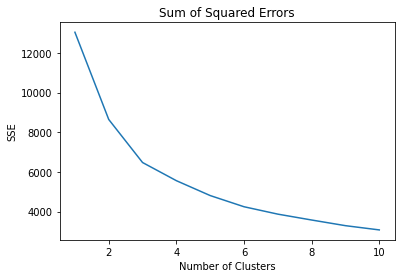

In [33]:
#elbow plot for kmeans
vcurve = plt.figure()
plt.plot(range(1,11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Sum of Squared Errors')
plt.show()
#vcurve.savefig('../img/kmeans_vcurve.png')

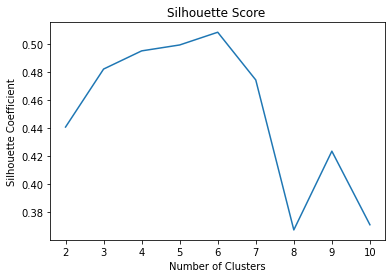

In [31]:
#when k=5
s_score=[]
#range_n_clusters=(2,3,4,5,6,7,8,9,10)
for n_clusters in range(2,11):
    score=[]
    clusterer = KMeans(n_clusters=n_clusters,init='random', random_state=None)
    preds = clusterer.fit_predict(x)
    #centers = clusterer.cluster_centers_
    score = silhouette_score(x, preds)
    s_score.append(score)
    
s_score
vcurve = plt.figure()
plt.plot(range(2,11), s_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Score ')
plt.show()

In [43]:
#hierachical clustering k=10
ahc = AgglomerativeClustering(n_clusters = 10,linkage='complete')
ahc_clusters = ahc.fit_predict(x)



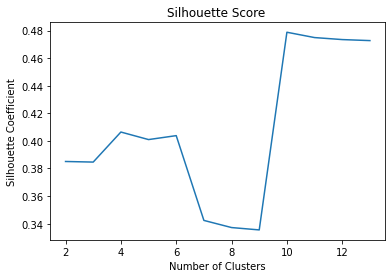

In [37]:
#silhouette_scores ahc
silhouette_scores = [] 

for n_cluster in range(2, 14):
    silhouette_scores.append( 
        silhouette_score(x, AgglomerativeClustering(n_clusters = n_cluster,linkage="complete").fit_predict(x))) 
vcurve = plt.figure()
plt.plot(range(2,14), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Score ')
plt.show()

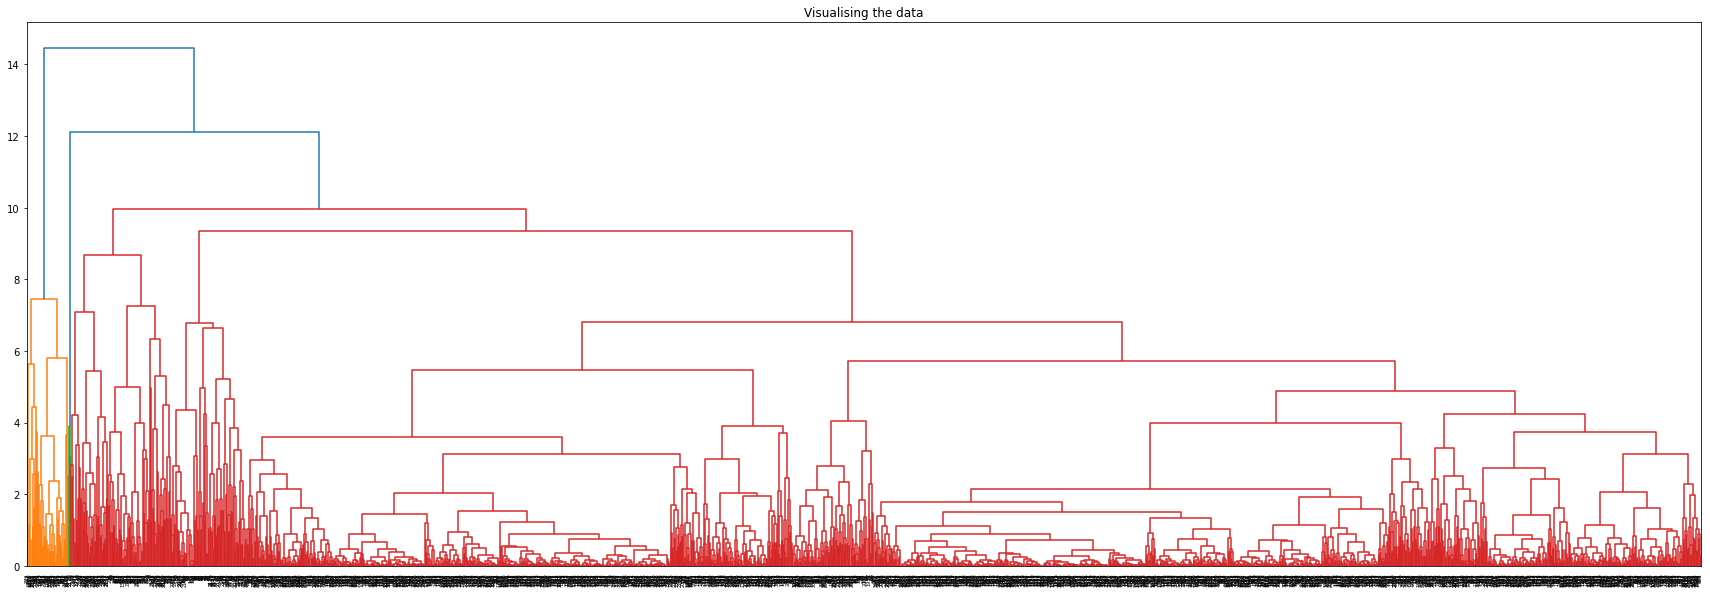

In [34]:
#Dendrogram
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.figure(figsize =(30, 10)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(x, method ='complete'))) 

In [44]:
#result
df['ahc_cluster'] = ahc_clusters
df.head(10)
#df.to_excel("../Downloads/output2.xlsx")  

,is_primary_school,is_middle_school,distance_to_subway_station,distance_to_bus_station,distance_to_parking_lot,distance_to_coach_station,km_cluster,ahc_cluster
0,1,0,88.49,0.51,2.11,20.84,0,2
1,1,0,55.93,0.08,3.96,25.31,0,0
2,0,1,74.15,0.17,4.72,6.75,0,8
3,1,0,73.22,0.25,3.88,6.92,0,8
4,1,0,51.12,0.08,0.08,15.94,0,3
5,0,1,51.12,0.08,0.17,16.20,0,0
6,1,0,52.13,0.08,8.60,20.75,0,5
7,1,0,39.90,0.08,0.08,9.62,0,3
8,0,1,71.03,0.08,1.43,9.45,0,7
9,1,0,70.86,0.08,1.10,9.70,0,7


In [40]:
#analysis of the kmeans
label_count = df.groupby('km_cluster')['is_middle_school'].count()
label_count_rate = label_count/df.shape[0]
kmeans_record_count = pd.concat((label_count,label_count_rate),axis=1)
kmeans_record_count.columns = ['record_count','record_rate']

kmeans_record_count

,record_count,record_rate
km_cluster,,
0,280,0.128854
1,766,0.352508
2,1127,0.518638


In [41]:
#average the result features
kmeans_numeric_features = df.groupby('km_cluster')[['is_primary_school','is_middle_school','distance_to_subway_station', 'distance_to_bus_station', 'distance_to_parking_lot', 'distance_to_coach_station']].mean()
kmeans_numeric_features

,is_primary_school,is_middle_school,distance_to_subway_station,distance_to_bus_station,distance_to_parking_lot,distance_to_coach_station
km_cluster,,,,,,
0,0.860714,0.139286,35.172250,0.302036,2.077571,9.190929
1,0.000000,1.000000,5.403982,0.199922,0.233172,3.668225
2,1.000000,0.000000,3.515324,0.212440,0.222919,3.479743


In [46]:
#ahc result analysis
label_count = df.groupby('ahc_cluster')['is_middle_school'].count()
label_count_rate = label_count/df.shape[0]
ahc_record_count = pd.concat((label_count,label_count_rate),axis=1)
ahc_record_count.columns = ['record_count','record_rate']

ahc_record_count

,record_count,record_rate
ahc_cluster,,
0,98,0.045099
1,39,0.017948
2,28,0.012885
3,1179,0.542568
4,709,0.326277
5,3,0.001381
6,15,0.006903
7,54,0.024850
8,14,0.006443


In [47]:
#ahc result k=10
ahc_numeric_features = df.groupby('ahc_cluster')[['is_primary_school','is_middle_school','distance_to_subway_station', 'distance_to_bus_station', 'distance_to_parking_lot', 'distance_to_coach_station']].mean()
ahc_numeric_features

,is_primary_school,is_middle_school,distance_to_subway_station,distance_to_bus_station,distance_to_parking_lot,distance_to_coach_station
ahc_cluster,,,,,,
0,0.530612,0.469388,21.882857,0.251327,1.497449,15.929796
1,0.923077,0.076923,4.712821,0.661795,1.170513,6.060256
2,1.000000,0.000000,61.860357,0.357857,2.238214,3.857143
3,1.000000,0.000000,4.797676,0.203961,0.292519,3.774003
4,0.000000,1.000000,3.370197,0.198702,0.195458,3.244161
5,1.000000,0.000000,29.553333,0.223333,7.223333,21.203333
6,0.866667,0.133333,18.036667,1.104000,0.876667,6.473333
7,0.555556,0.444444,72.777593,0.150185,0.748148,3.936111
8,0.571429,0.428571,76.412143,0.221429,5.102857,6.520000
